In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [33]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [34]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,2190.240321,NaN
1,Afghanistan,2017,2202.570851,NaN
2,Afghanistan,2016,2200.764487,NaN
3,Afghanistan,2015,2212.750899,NaN
4,Afghanistan,2014,2249.253738,NaN
5,Afghanistan,2013,2264.317575,NaN


In [35]:
internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines=False)

b'Skipping line 4675: expected 4 fields, saw 6\n'


In [36]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [37]:
gdp_df.shape

(6608, 4)

gdp_df has 6608 rows and 4 columns

In [38]:
internet_df.shape

(4675, 4)

internet_df has 4675 rows and 4 columns

In [39]:
gdp_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [40]:
internet_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [41]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6598,Zimbabwe,1997,3580.048793,NaN
6599,Zimbabwe,1996,3520.430146,NaN
6600,Zimbabwe,1995,3226.413930,NaN
6601,Zimbabwe,1994,3263.934978,NaN
6602,Zimbabwe,1993,3033.504852,NaN
6603,Zimbabwe,1992,3054.889178,NaN
6604,Zimbabwe,1991,3426.598094,NaN
6605,Zimbabwe,1990,3324.348171,NaN
6606,footnoteSeqID,Footnote,NaN,NaN
6607,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [42]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4665,170,Refers to the total population.,NaN,NaN
4666,171,Internet Dial-up customers.,NaN,NaN
4667,172,Population age 16+ using the Internet in the l...,NaN,NaN
4668,173,Population age 16+ using internet in the last ...,NaN,NaN
4669,174,"U.S. Census Bureau, Table 2. Reported Internet...",NaN,NaN
4670,175,Includes individuals 3 years and older,NaN,NaN
4671,176,NTIA/CPS survey.,NaN,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN,NaN
4673,179,Preliminary. Country estimate.,NaN,NaN
4674,180,The methodology used to estimated the figure f...,NaN,NaN


In [56]:
gdp_df.drop(columns=['Value Footnotes'], axis=1, inplace=True)

In [57]:
internet_df.drop(columns=['Value Footnotes'], axis=1, inplace=True)

In [66]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [68]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [72]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,2190.240321
1,Afghanistan,2017,2202.570851
2,Afghanistan,2016,2200.764487
3,Afghanistan,2015,2212.750899
4,Afghanistan,2014,2249.253738


In [71]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [88]:
gdp_and_internet_use = gdp_df.merge(internet_df, left_on=['Country','Year'], right_on=['Country','Year'], how='inner')

In [89]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2249.253738,6.390000
1,Afghanistan,2013,2264.317575,5.900000
2,Afghanistan,2012,2220.481526,5.454545
3,Afghanistan,2011,2037.608607,5.000000
4,Afghanistan,2010,2093.743565,4.000000


In [92]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3432,Zimbabwe,1997,3580.048793,0.033080
3433,Zimbabwe,1996,3520.430146,0.016790
3434,Zimbabwe,1995,3226.413930,0.007684
3435,Zimbabwe,1994,3263.934978,0.001739
3436,Zimbabwe,1990,3324.348171,0.000000


In [91]:
gdp_and_internet_use.dropna(inplace=True)

In [96]:
gi_subset = gdp_and_internet_use[gdp_and_internet_use["Year"].isin(["2004","2009","2014"])]

In [97]:
gi_subset.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2249.253738,6.390000
5,Afghanistan,2009,1881.777626,3.550000
10,Afghanistan,2004,1284.127338,0.105809
13,Albania,2014,11828.232264,60.100000
18,Albania,2009,10528.778102,41.200000


In [98]:
gi_subset.shape

(479, 4)

In [100]:
gdp_internet_2004_ss = gi_subset[gi_subset["Year"] == "2004"]

In [102]:
gdp_internet_2009_ss = gi_subset[gi_subset["Year"] == "2009"]

In [105]:
gdp_internet_2014_ss = gi_subset[gi_subset["Year"] == "2014"]

In [107]:
gdp_internet_2014_ss.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2249.253738,6.39
13,Albania,2014,11828.232264,60.10
34,Algeria,2014,11329.428688,18.09
56,Angola,2014,8239.832077,21.26
76,Antigua and Barbuda,2014,18104.241470,64.00


In [110]:
gdp_internet_2014_ss[gdp_internet_2014_ss.Internet_Users_Pct == gdp_internet_2014_ss.Internet_Users_Pct.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1360,Iceland,2014,49911.069825,98.16


In [111]:
gdp_internet_2014_ss[gdp_internet_2014_ss.Internet_Users_Pct == gdp_internet_2014_ss.Internet_Users_Pct.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3066,Timor-Leste,2014,3264.739189,1.14


In [112]:
gdp_internet_2009_ss[gdp_internet_2009_ss.Internet_Users_Pct == gdp_internet_2009_ss.Internet_Users_Pct.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1365,Iceland,2009,48428.312438,93.0


In [113]:
gdp_internet_2009_ss[gdp_internet_2009_ss.Internet_Users_Pct == gdp_internet_2009_ss.Internet_Users_Pct.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3071,Timor-Leste,2009,2724.834868,0.185252


In [114]:
gdp_internet_2004_ss[gdp_internet_2004_ss.Internet_Users_Pct == gdp_internet_2004_ss.Internet_Users_Pct.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2964,Sweden,2004,45029.814344,83.89


In [115]:
gdp_internet_2004_ss[gdp_internet_2004_ss.Internet_Users_Pct == gdp_internet_2004_ss.Internet_Users_Pct.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2111,Myanmar,2004,1696.88176,0.024337


In [116]:
gdp_internet_2014_ss[gdp_internet_2014_ss.GDP_Per_Capita == gdp_internet_2014_ss.GDP_Per_Capita.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1777,Luxembourg,2014,108911.348894,94.67


In [117]:
gdp_internet_2014_ss[gdp_internet_2014_ss.GDP_Per_Capita == gdp_internet_2014_ss.GDP_Per_Capita.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
519,Burundi,2014,886.235777,1.38


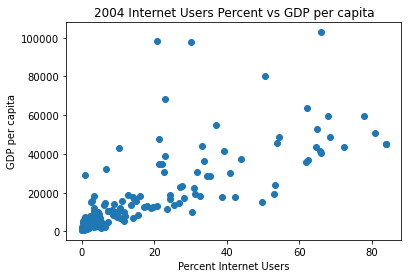

In [123]:
plt.scatter(x = 'Internet_Users_Pct', y ='GDP_Per_Capita', data = gdp_internet_2004_ss)
plt.xlabel('Percent Internet Users')
plt.ylabel('GDP per capita')
plt.title('2004 Internet Users Percent vs GDP per capita');

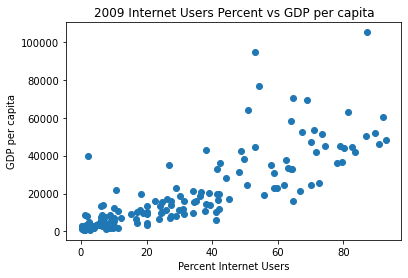

In [121]:
plt.scatter(x = 'Internet_Users_Pct', y ='GDP_Per_Capita', data = gdp_internet_2009_ss)
plt.xlabel('Percent Internet Users')
plt.ylabel('GDP per capita')
plt.title('2009 Internet Users Percent vs GDP per capita');

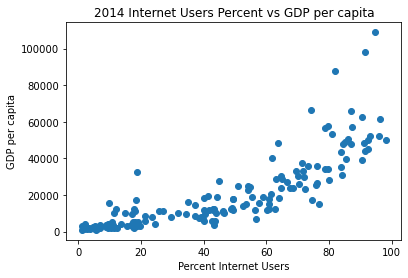

In [124]:
plt.scatter(x = 'Internet_Users_Pct', y ='GDP_Per_Capita', data = gdp_internet_2014_ss)
plt.xlabel('Percent Internet Users')
plt.ylabel('GDP per capita')
plt.title('2014 Internet Users Percent vs GDP per capita');

I found the scatterplots very interesting. In 2004 there was a definite trend line that the higher the GDP the higher the percentage of internet users. The trend from 2004 to 2014, over the next ten years, was a significant flatting on the line. Also there did not seem to be as big of a shift from left to the right of the plot as I would have expected. I guess I can also say there does not also seem to as much of a shift from the bottom of the plot upward as I would have liked to see. Overall I think this indicates a slower rate of internet adoption and of economic growth than one might have hoped for. 

Both percentage of internet use and GDP per capita appear to be unimodal for 2014.

In [ ]:
gdp_internet_2014_ss[gdp_internet_2014_ss.GDP_Per_Capita == gdp_internet_2014_ss.GDP_Per_Capita.max()]

In [125]:
gdp_internet_2014_ss.nlargest(5, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1360,Iceland,2014,49911.069825,98.16
2275,Norway,2014,61308.763730,96.30
833,Denmark,2014,52172.606425,95.99
1777,Luxembourg,2014,108911.348894,94.67
2164,Netherlands,2014,52432.619199,93.17
